In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [ ]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tqdm import tqdm

print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.config.list_physical_devices('GPU') else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.8.2
• Using TensorFlow Hub Version:  0.12.0
• GPU Device Not Found. Running on CPU


In [ ]:
# Select the Hub/TF2 Module to Use

module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
import os
import random
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_path = '/content/drive/MyDrive/dataset'

source_path_lima_asli = os.path.join(source_path, 'uang50asli')
source_path_seratus_asli = os.path.join(source_path, 'uang100asli')
source_path_lima_palsu = os.path.join(source_path, 'uang50palsu')
source_path_seratus_palsu = os.path.join(source_path, 'uang100palsu')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_lima_asli))} images of original 50 thousand nominal money.")
print(f"There are {len(os.listdir(source_path_seratus_asli))} images of original 100 thousand nominal money.")
print(f"There are {len(os.listdir(source_path_lima_palsu))} images of fake 50 thousand denomination.")
print(f"There are {len(os.listdir(source_path_seratus_palsu))} images of fake 100 thousand denomination.")

There are 180 images of original 50 thousand nominal money.
There are 180 images of original 100 thousand nominal money.
There are 180 images of fake 50 thousand denomination.
There are 180 images of fake 100 thousand denomination.


In [ ]:
# Define root directory
root_dir = '/content/real-v-fake'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):

  print(f"Creating \'{root_path}\' directory.")
  os.makedirs(root_path)

  training_dir = os.path.join(root_path, 'training')
  os.makedirs(training_dir)
  print(f"\nTraining directory created as \'{training_dir}\'.")

  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)
  print(f"\nValidation directory created as \'{validation_dir}\'.")

  testing_dir = os.path.join(root_path, 'testing')
  os.makedirs(testing_dir)
  print(f"\nTesting directory created as \'{testing_dir}\'.")

  print("\nCreating the subfolders for storing fake and real money images.")
  
  training_real_lima_dir = os.path.join(training_dir, "money50real")
  training_real_seratus_dir = os.path.join(training_dir, "money100real")
  training_fake_lima_dir = os.path.join(training_dir, "money50fake")
  training_fake_seratus_dir = os.path.join(training_dir, "money100fake")
  os.makedirs(training_real_lima_dir)
  os.makedirs(training_real_seratus_dir)
  os.makedirs(training_fake_lima_dir)
  os.makedirs(training_fake_seratus_dir)
  print(f"\'{training_real_lima_dir}\' and \'{training_real_seratus_dir}\' created.")
  print(f"\'{training_fake_lima_dir}\' and \'{training_fake_seratus_dir}\' created.")

  validation_real_lima_dir = os.path.join(validation_dir, "money50real")
  validation_real_seratus_dir = os.path.join(validation_dir, "money100real")
  validation_fake_lima_dir = os.path.join(validation_dir, "money50fake")
  validation_fake_seratus_dir = os.path.join(validation_dir, "money100fake")
  os.makedirs(validation_real_lima_dir)
  os.makedirs(validation_real_seratus_dir)
  os.makedirs(validation_fake_lima_dir)
  os.makedirs(validation_fake_seratus_dir)
  print(f"\'{validation_real_lima_dir}\' and \'{validation_real_seratus_dir}\' created.")
  print(f"\'{validation_fake_lima_dir}\' and \'{validation_fake_seratus_dir}\' created.")

  testing_real_lima_dir = os.path.join(testing_dir, "money50real")
  testing_real_seratus_dir = os.path.join(testing_dir, "money100real")
  testing_fake_lima_dir = os.path.join(testing_dir, "money50fake")
  testing_fake_seratus_dir = os.path.join(testing_dir, "money100fake")
  os.makedirs(testing_real_lima_dir)
  os.makedirs(testing_real_seratus_dir)
  os.makedirs(testing_fake_lima_dir)
  os.makedirs(testing_fake_seratus_dir)
  print(f"\'{testing_real_lima_dir}\' and \'{testing_real_seratus_dir}\' created.")
  print(f"\'{testing_fake_lima_dir}\' and \'{testing_fake_seratus_dir}\' created.")

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

Creating '/content/real-v-fake' directory.

Training directory created as '/content/real-v-fake/training'.

Validation directory created as '/content/real-v-fake/validation'.

Testing directory created as '/content/real-v-fake/testing'.

Creating the subfolders for storing fake and real money images.
'/content/real-v-fake/training/money50real' and '/content/real-v-fake/training/money100real' created.
'/content/real-v-fake/training/money50fake' and '/content/real-v-fake/training/money100fake' created.
'/content/real-v-fake/validation/money50real' and '/content/real-v-fake/validation/money100real' created.
'/content/real-v-fake/validation/money50fake' and '/content/real-v-fake/validation/money100fake' created.
'/content/real-v-fake/testing/money50real' and '/content/real-v-fake/testing/money100real' created.
'/content/real-v-fake/testing/money50fake' and '/content/real-v-fake/testing/money100fake' created.


In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/real-v-fake/training
/content/real-v-fake/testing
/content/real-v-fake/validation
/content/real-v-fake/training/money50fake
/content/real-v-fake/training/money100real
/content/real-v-fake/training/money100fake
/content/real-v-fake/training/money50real
/content/real-v-fake/testing/money50fake
/content/real-v-fake/testing/money100real
/content/real-v-fake/testing/money100fake
/content/real-v-fake/testing/money50real
/content/real-v-fake/validation/money50fake
/content/real-v-fake/validation/money100real
/content/real-v-fake/validation/money100fake
/content/real-v-fake/validation/money50real


In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
  
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
        
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  validation_length_dep = int(len(files) - training_length)
  validation_length = int(validation_length_dep/2)
  testing_length = int(len(files) - validation_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[-validation_length_dep:-validation_length]
  testing_set = shuffled_set[testing_length:]
    
  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)
  
  for filename in validation_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    copyfile(this_file, destination)
        
  for filename in testing_set:
    this_file = SOURCE + filename
    destination = TESTING + filename
    copyfile(this_file, destination)


In [ ]:
# Test your split_data function

# Define paths
REAL_LIMA_SOURCE_DIR = "/content/drive/MyDrive/dataset/uang50asli/"
REAL_SERATUS_SOURCE_DIR = "/content/drive/MyDrive/dataset/uang100asli/"
FAKE_LIMA_SOURCE_DIR = "/content/drive/MyDrive/dataset/uang50palsu/"
FAKE_SERATUS_SOURCE_DIR = "/content/drive/MyDrive/dataset/uang100palsu/"

TRAINING_DIR = "/content/real-v-fake/training/"
VALIDATION_DIR = "/content/real-v-fake/validation/"
TESTING_DIR = "/content/real-v-fake/testing/"

TRAINING_REAL_LIMA_DIR = os.path.join(TRAINING_DIR, "money50real/")
VALIDATION_REAL_LIMA_DIR = os.path.join(VALIDATION_DIR, "money50real/")
TESTING_REAL_LIMA_DIR = os.path.join(TESTING_DIR, "money50real/")

TRAINING_REAL_SERATUS_DIR = os.path.join(TRAINING_DIR, "money100real/")
VALIDATION_REAL_SERATUS_DIR = os.path.join(VALIDATION_DIR, "money100real/")
TESTING_REAL_SERATUS_DIR = os.path.join(TESTING_DIR, "money100real/")

TRAINING_FAKE_LIMA_DIR = os.path.join(TRAINING_DIR, "money50fake/")
VALIDATION_FAKE_LIMA_DIR = os.path.join(VALIDATION_DIR, "money50fake/")
TESTING_FAKE_LIMA_DIR = os.path.join(TESTING_DIR, "money50fake/")

TRAINING_FAKE_SERATUS_DIR = os.path.join(TRAINING_DIR, "money100fake/")
VALIDATION_FAKE_SERATUS_DIR = os.path.join(VALIDATION_DIR, "money100fake/")
TESTING_FAKE_SERATUS_DIR = os.path.join(TESTING_DIR, "money100fake/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_REAL_LIMA_DIR)) > 0:
  for file in os.scandir(TRAINING_REAL_LIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_REAL_SERATUS_DIR)) > 0:
  for file in os.scandir(TRAINING_REAL_SERATUS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_FAKE_LIMA_DIR)) > 0:
  for file in os.scandir(TRAINING_FAKE_LIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_FAKE_SERATUS_DIR)) > 0:
  for file in os.scandir(TRAINING_FAKE_SERATUS_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_REAL_LIMA_DIR)) > 0:
  for file in os.scandir(VALIDATION_REAL_LIMA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_REAL_SERATUS_DIR)) > 0:
  for file in os.scandir(VALIDATION_REAL_SERATUS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FAKE_LIMA_DIR)) > 0:
  for file in os.scandir(VALIDATION_FAKE_LIMA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FAKE_SERATUS_DIR)) > 0:
  for file in os.scandir(VALIDATION_FAKE_SERATUS_DIR):
    os.remove(file.path)

if len(os.listdir(TESTING_REAL_LIMA_DIR)) > 0:
  for file in os.scandir(TESTING_REAL_LIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_REAL_SERATUS_DIR)) > 0:
  for file in os.scandir(TESTING_REAL_SERATUS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_FAKE_LIMA_DIR)) > 0:
  for file in os.scandir(TESTING_FAKE_LIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_FAKE_SERATUS_DIR)) > 0:
  for file in os.scandir(TESTING_FAKE_SERATUS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(REAL_LIMA_SOURCE_DIR, TRAINING_REAL_LIMA_DIR, VALIDATION_REAL_LIMA_DIR, TESTING_REAL_LIMA_DIR, split_size)
split_data(REAL_SERATUS_SOURCE_DIR, TRAINING_REAL_SERATUS_DIR, VALIDATION_REAL_SERATUS_DIR, TESTING_REAL_SERATUS_DIR, split_size)
split_data(FAKE_LIMA_SOURCE_DIR, TRAINING_FAKE_LIMA_DIR, VALIDATION_FAKE_LIMA_DIR, TESTING_FAKE_LIMA_DIR, split_size)
split_data(FAKE_SERATUS_SOURCE_DIR, TRAINING_FAKE_SERATUS_DIR, VALIDATION_FAKE_SERATUS_DIR, TESTING_FAKE_SERATUS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_REAL_LIMA_DIR))} images of original 50 thousand nominal money for training")
print(f"There are {len(os.listdir(TRAINING_REAL_SERATUS_DIR))} images of original 100 thousand nominal money for training")
print(f"There are {len(os.listdir(TRAINING_FAKE_LIMA_DIR))} images of fake 50 thousand denomination for training")
print(f"There are {len(os.listdir(TRAINING_FAKE_SERATUS_DIR))} images of fake 100 thousand denomination for training")

print(f"\nThere are {len(os.listdir(VALIDATION_REAL_LIMA_DIR))} images of original 50 thousand nominal money for validation")
print(f"There are {len(os.listdir(VALIDATION_REAL_SERATUS_DIR))} images of original 100 thousand nominal money for validation")
print(f"There are {len(os.listdir(VALIDATION_FAKE_LIMA_DIR))} images of fake 50 thousand denomination for validation")
print(f"There are {len(os.listdir(VALIDATION_FAKE_SERATUS_DIR))} images of fake 100 thousand denomination for validation")

print(f"\nThere are {len(os.listdir(TESTING_REAL_LIMA_DIR))} images of original 50 thousand nominal money for testing")
print(f"There are {len(os.listdir(TESTING_REAL_SERATUS_DIR))} images of original 100 thousand nominal money for testing")
print(f"There are {len(os.listdir(TESTING_FAKE_LIMA_DIR))} images of fake 50 thousand denomination for testing")
print(f"There are {len(os.listdir(TESTING_FAKE_SERATUS_DIR))} images of fake 100 thousand denomination for testing")



There are 144 images of original 50 thousand nominal money for training
There are 144 images of original 100 thousand nominal money for training
There are 144 images of fake 50 thousand denomination for training
There are 144 images of fake 100 thousand denomination for training

There are 18 images of original 50 thousand nominal money for validation
There are 18 images of original 100 thousand nominal money for validation
There are 18 images of fake 50 thousand denomination for validation
There are 18 images of fake 100 thousand denomination for validation

There are 18 images of original 50 thousand nominal money for testing
There are 18 images of original 100 thousand nominal money for testing
There are 18 images of fake 50 thousand denomination for testing
There are 18 images of fake 100 thousand denomination for testing


tfds.core.DatasetInfo(
    name='image_folder',
    version=1.0.0,
    description='Generic image classification dataset.',
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    features=FeaturesDict({
        'image': Image(shape=(224, 224, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=4),
    }),
    total_num_examples=720,
    splits={
        'testing': 72,
        'training': 576,
        'validation': 72,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)



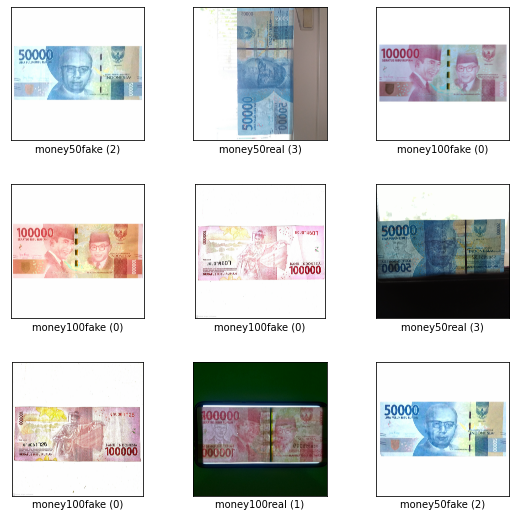

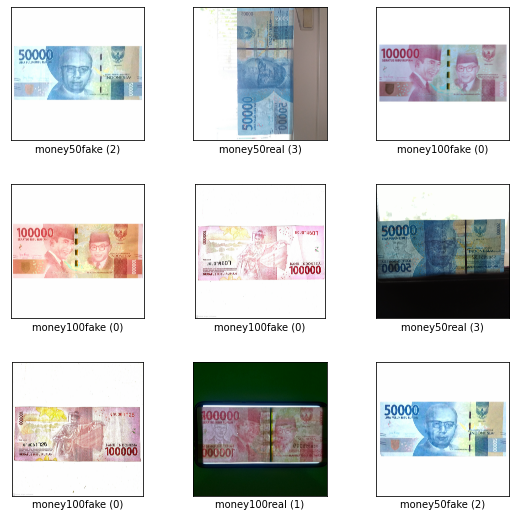

In [ ]:
# Load dataset menggunakan tfds.ImageFolder
import tensorflow_datasets as tfds

builder = tfds.ImageFolder('/content/real-v-fake/', shape=(224, 224, 3))
print(builder.info)  # num examples, labels... are automatically calculated
ds = builder.as_dataset(split='training', shuffle_files=True, as_supervised=True)
tfds.show_examples(ds, builder.info)

In [ ]:
assert isinstance(ds, tf.data.Dataset)

print(ds, tf.data.Dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <class 'tensorflow.python.data.ops.dataset_ops.DatasetV2'>


In [ ]:
def format_image(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return  image, label

In [ ]:
BATCH_SIZE = 32 #@param {type:"integer"}

In [ ]:
# Bagian ini merupakan operasi masing-masing dataset yang diinputkan ke dalam
# variabel train_batches, validation_batches, dan test_batches

train_batches = ds.shuffle(720 // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = ds.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = ds.map(format_image).batch(1)

In [ ]:
# Bagian ini untuk menampilkan isi dari variabel train_batches

for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape

TensorShape([32, 224, 224, 3])

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

In [ ]:
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()


Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 2,228,996
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
#@title (Optional) Unfreeze some layers
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
    feature_extractor.trainable = True
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [ ]:
if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_batches,
                 epochs=7,
                 validation_data=validation_batches)

Epoch 1/7
18/18 [==============================] - 174s 9s/step - loss: 0.5752 - accuracy: 0.8194 - val_loss: 0.6015 - val_accuracy: 0.7969
Epoch 2/7
18/18 [==============================] - 165s 9s/step - loss: 0.0971 - accuracy: 0.9983 - val_loss: 0.2809 - val_accuracy: 0.9514
Epoch 3/7
18/18 [==============================] - 171s 9s/step - loss: 0.0870 - accuracy: 1.0000 - val_loss: 0.1502 - val_accuracy: 0.9965
Epoch 4/7
18/18 [==============================] - 165s 9s/step - loss: 0.0856 - accuracy: 1.0000 - val_loss: 0.1054 - val_accuracy: 1.0000
Epoch 5/7
18/18 [==============================] - 163s 9s/step - loss: 0.0855 - accuracy: 1.0000 - val_loss: 0.0907 - val_accuracy: 1.0000
Epoch 6/7
18/18 [==============================] - 176s 9s/step - loss: 0.0846 - accuracy: 1.0000 - val_loss: 0.0862 - val_accuracy: 1.0000
Epoch 7/7
18/18 [==============================] - 169s 9s/step - loss: 0.0852 - accuracy: 1.0000 - val_loss: 0.0846 - val_accuracy: 1.0000


In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(fn)
  print(classes)

Saving money100fake_61.jpg to money100fake_61.jpg
money100fake_61.jpg
[[0.48622453 0.17633817 0.32921034 0.00822693]]


In [ ]:
model.save("model_h5_v5.h5")
REAL_VS_FAKE_SAVED_MODEL = "smr_saved_model"
tf.saved_model.save(model, REAL_VS_FAKE_SAVED_MODEL)

INFO:tensorflow:Assets written to: smr_saved_model/assets


INFO:tensorflow:Assets written to: smr_saved_model/assets


In [ ]:
%%bash -s $REAL_VS_FAKE_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['keras_layer_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 224, 224, 3)
      name: serving_default_keras_layer_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 4)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
loaded = tf.saved_model.load(REAL_VS_FAKE_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'keras_layer_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_layer_input')})
{'dense': TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(REAL_VS_FAKE_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_models_dir = pathlib.Path("/content/")

tflite_model_file = tflite_models_dir/'model4.tflite'
tflite_model_file.write_bytes(tflite_model)

2651728

In [ ]:
# Load TFLite model and allocate tensors.
tflite_model_file = '/content/model4.tflite'  
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
predictions = []

test_labels, test_imgs = [], []
for img, label in tqdm(test_batches.take(72)):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

score = 0
for item in range(0,72):
  prediction=np.argmax(predictions[item])
  label = test_labels[item]
  if prediction==label:
    score=score+1

print("\nOut of 72 predictions I got " + str(score) + " correct")

100%|██████████| 72/72 [01:21<00:00,  1.14s/it]


Out of 72 predictions I got 72 correct


In [ ]:
#@title Define utility functions once for plotting
# Utilities for plotting

class_names = ['money100fake', 'money100real', 'money50fake', 'money50real' ]

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)

    print(type(predicted_label), type(true_label))
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

<class 'numpy.int64'> <class 'numpy.int64'>


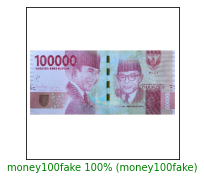

<class 'numpy.int64'> <class 'numpy.int64'>


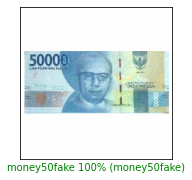

<class 'numpy.int64'> <class 'numpy.int64'>


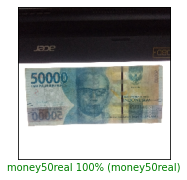

<class 'numpy.int64'> <class 'numpy.int64'>


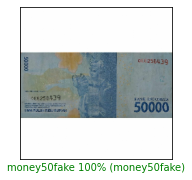

<class 'numpy.int64'> <class 'numpy.int64'>


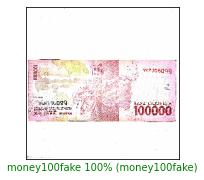

<class 'numpy.int64'> <class 'numpy.int64'>


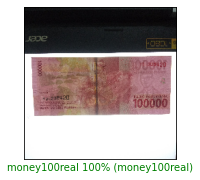

In [ ]:
#@title Visualize the outputs { run: "auto" }
max_index = 6 #@param {type:"slider", min:1, max:9, step:1}
for index in range(0,max_index):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(index, predictions, test_labels, test_imgs)
  plt.show()

In [ ]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
try:
    from google.colab import files
    files.download('model4.tflite')
    files.download('labels.txt')
    files.download('model_h5_v5.h5')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!mkdir -p test_images

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(72)):
    image = tf.cast(image * 255.0, tf.uint8)
    image = tf.squeeze(image).numpy()
    pil_image = Image.fromarray(image)
    pil_image.save('test_images/{}_{}.jpg'.format(class_names[label[0]], index))

In [ ]:
!ls test_images

money100fake_10.jpg  money100real_24.jpg  money50fake_45.jpg
money100fake_11.jpg  money100real_2.jpg   money50fake_61.jpg
money100fake_25.jpg  money100real_47.jpg  money50fake_70.jpg
money100fake_26.jpg  money100real_48.jpg  money50fake_7.jpg
money100fake_34.jpg  money100real_54.jpg  money50real_14.jpg
money100fake_38.jpg  money100real_55.jpg  money50real_16.jpg
money100fake_40.jpg  money100real_56.jpg  money50real_20.jpg
money100fake_41.jpg  money100real_59.jpg  money50real_23.jpg
money100fake_44.jpg  money100real_64.jpg  money50real_30.jpg
money100fake_4.jpg   money100real_66.jpg  money50real_32.jpg
money100fake_50.jpg  money100real_67.jpg  money50real_33.jpg
money100fake_52.jpg  money50fake_0.jpg	  money50real_35.jpg
money100fake_53.jpg  money50fake_13.jpg   money50real_37.jpg
money100fake_60.jpg  money50fake_15.jpg   money50real_39.jpg
money100fake_62.jpg  money50fake_17.jpg   money50real_46.jpg
money100fake_68.jpg  money50fake_22.jpg   money50real_49.jpg
money100fake_69.jpg  money

In [ ]:
!zip -qq smr_test_images.zip -r test_images/

In [ ]:
try:
    files.download('smr_test_images.zip')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import tensorflow as tf
import cv2

#import tflite_runtime.interpreter as tflite

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model3.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
#input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
#interpreter.set_tensor(input_details[0]['index'], input_data)
im=cv2.imread('money50fake_80.jpg')
im = np.expand_dims(im, axis=0)
input_data = np.array(im, dtype=np.float32)

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.3504587  0.1619647  0.45150927 0.03606732]]
